In [155]:
# Data analysis
import pandas as pd 
import numpy as np  

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

# Data Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

! pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC , SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [156]:
# load the data set

df= pd.read_csv(r'C:\Users\Ndumbi Kimani\OneDrive\Desktop\Main Projects\10 Alytics\Python\Python Code\Peterside Hospital  Machine Learning\heart - heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [157]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


The heart CSV dataset contains 303 records and 14
columns, including the target variable. The features include:

age, sex, chest pain type (cp), resting blood pressure
(trestbps), serum cholesterol (chol), fasting blood sugar
(fbs), resting electrocardiographic results (restecg),
maximum heart rate achieved (thalach), exercise-induced
angina (exang), ST depression induced by exercise relative
to rest (oldpeak), the slope of the peak exercise ST segment
(slope), number of major vessels colored by flourosopy
(ca), and thalassemia (thal).

In [159]:
# For better understanding and flow of analysis , I will rename some of the columns

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [160]:
df.rename(columns={'age': 'age', 
                   'sex': 'sex',
                   'cp': 'chest_pain_type',
                   'trestbps':'resting_blood_pressure', 
                   'chol': 'cholestrol',
                   'fbs': 'fasting_blood_sugar',
                   'restecg': 'rest_ecg',
                   'thalach': 'max_heart_rate_achieved',
                   'exang': 'excercise_included_angina',
                   'oldpeak': 'st_depression',
                   'slope': 'st_slope',
                   'ca': 'num_major_vessels',
                   'thal': 'thalassemia',
                   'target': 'target',
                   
                  }, inplace=True)

In [161]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'excercise_included_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   cholestrol                 303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   rest_ecg                   303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   excercise_included_angina  303 non-null    int64  
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    int64  
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    int64  
 13  target                     303 non-null    int64  

In [163]:

# Statistical Analysis

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholestrol                   0
fasting_blood_sugar          0
rest_ecg                     0
max_heart_rate_achieved      0
excercise_included_angina    0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64


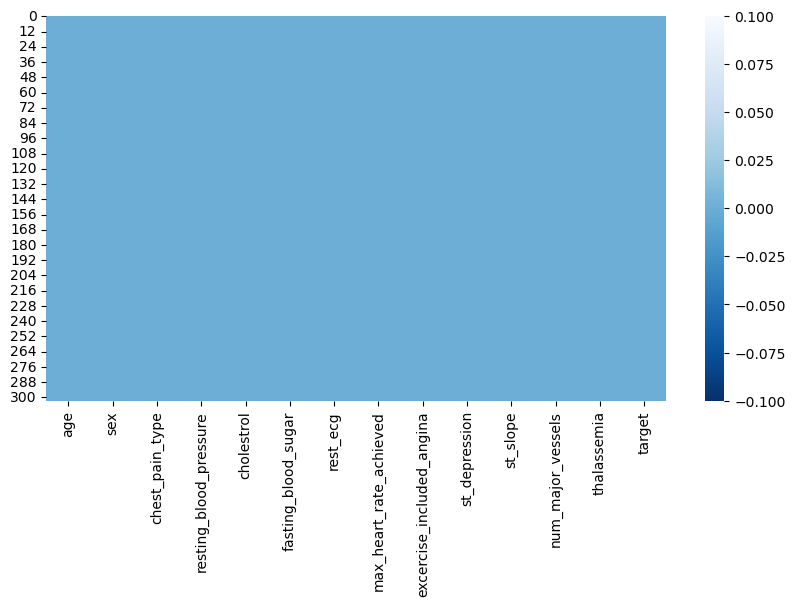

In [164]:
print(df.isnull().sum())

# Visualise the missing data
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, cmap = "Blues_r");

### Exploratory Data Analysis

#### Univariate Analysis

In [166]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'excercise_included_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [167]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


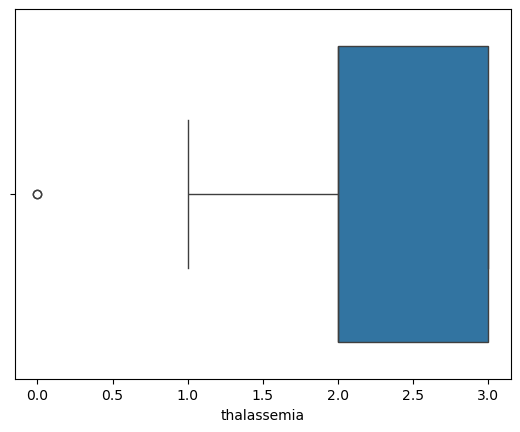

In [168]:
# check for outliers

sns.boxplot(x=df['thalassemia']);

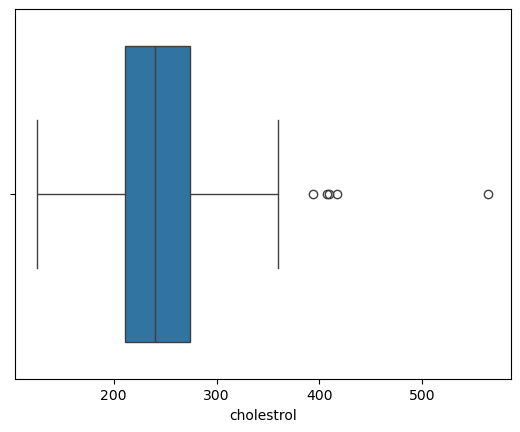

In [169]:
sns.boxplot(x=df['cholestrol']);

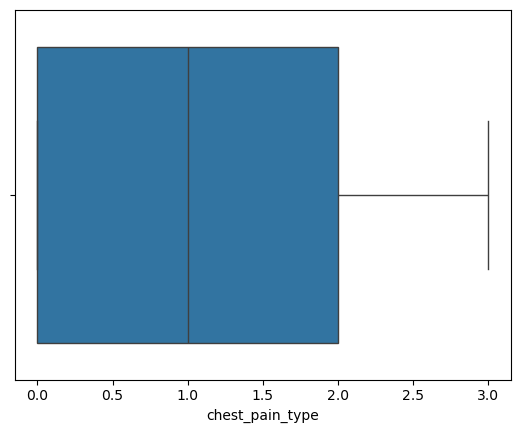

In [170]:
sns.boxplot(x=df['chest_pain_type']);

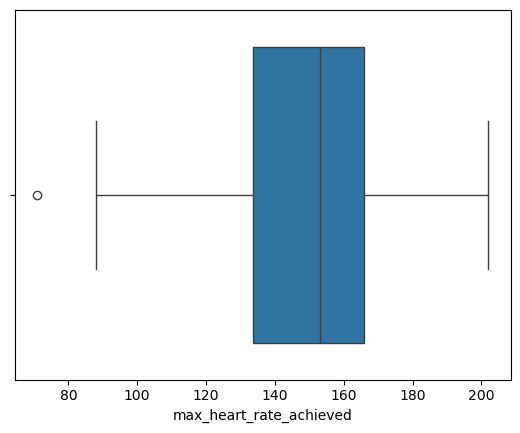

In [171]:
sns.boxplot(x=df['max_heart_rate_achieved']);

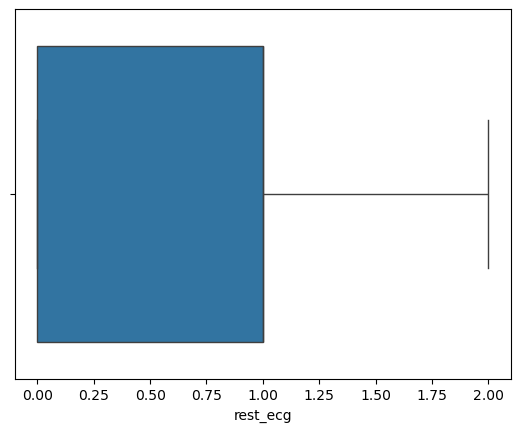

In [172]:
sns.boxplot(x=df['rest_ecg']);

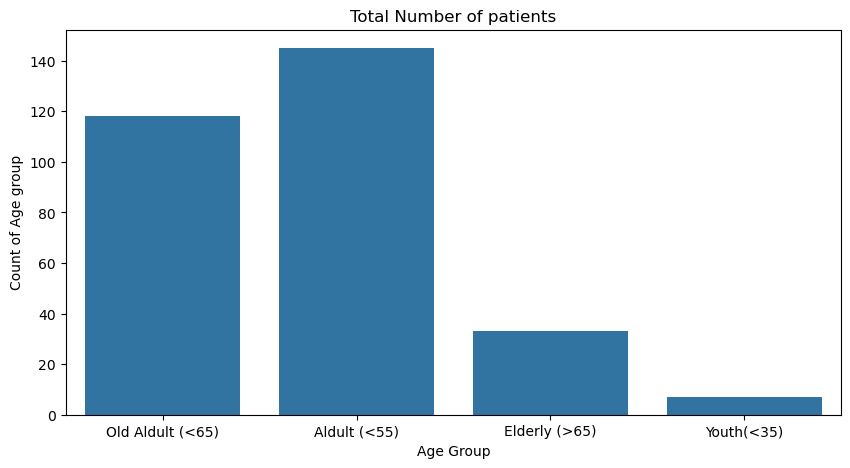

In [173]:
# Data Visualisation
# Age Bracket 

def age_bracket(age):
    if age <=35:
        return "Youth(<35)"
    elif age <=55:
        return "Aldult (<55)"
    elif age <=65:
        return "Old Aldult (<65)"
    else:
        return "Elderly (>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

plt.figure(figsize =(10,5))
sns.countplot(x="age_bracket" ,data=df )
plt.xlabel("Age Group")
plt.ylabel("Count of Age group")
plt.title("Total Number of patients");


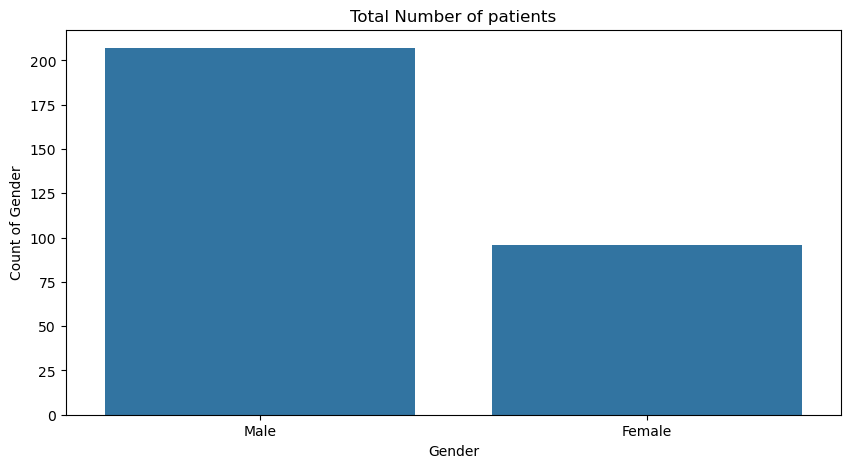

In [175]:
#Data Visualisation 
#sex

def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
df['gender'] = df['sex'].apply(gender)
plt.figure(figsize =(10,5))
sns.countplot(x="gender" ,data=df )
plt.xlabel("Gender")
plt.ylabel("Count of Gender")
plt.title("Total Number of patients");



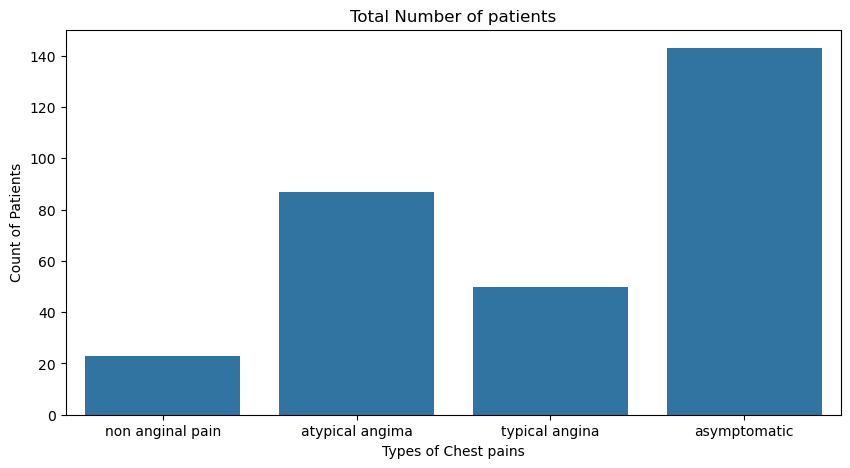

In [183]:
# Data Visualization
#Chest pains

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp== 2:
        return 'atypical angima'
    elif cp== 3:
        return 'non anginal pain'
    else :
        return 'asymptomatic'

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)
plt.figure(figsize =(10,5))
sns.countplot(x="cp_cat" ,data=df )
plt.xlabel("Types of Chest pains")
plt.ylabel("Count of Patients")
plt.title("Total Number of patients");


label
Yes    165
No     138
Name: count, dtype: int64


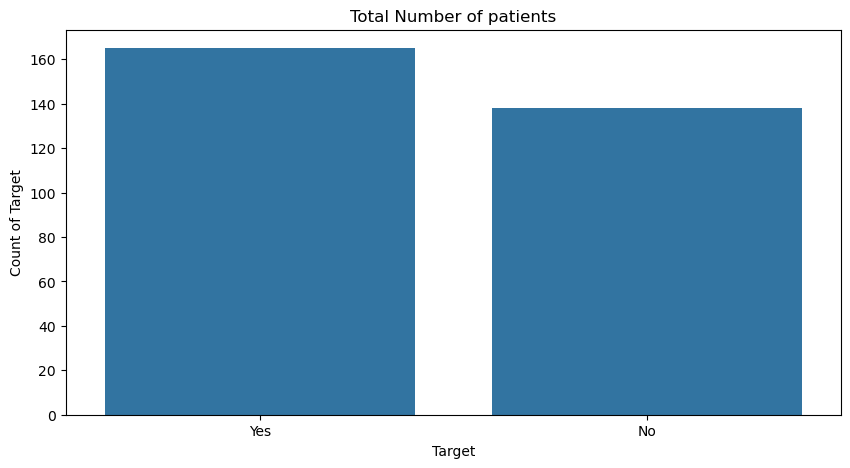

In [188]:
# Data Visualisation 
# target - have a disease or not (1=yes , 0=no)

def label(target):
    if target == 1:
        return 'Yes'
    else:
        return 'No'

df['label'] = df['target'].apply(label)

#total Patient in each category

print(df['label'].value_counts());

plt.figure(figsize =(10,5))
sns.countplot(x="label" ,data=df )
plt.xlabel("Target")
plt.ylabel("Count of Target")
plt.title("Total Number of patients");


### Bivariate Analysis

In [196]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Aldult (<65),Male,non anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Aldult (<55),Male,atypical angima,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Aldult (<55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Aldult (<65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Aldult (<65),Female,asymptomatic,Yes


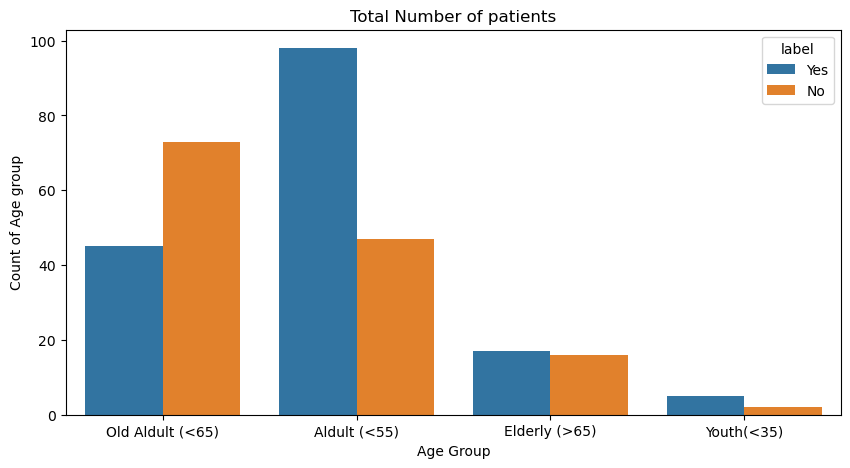

In [199]:
# investigating the group of patients by the target feature.

plt.figure(figsize =(10,5))
sns.countplot(x="age_bracket" ,data=df , hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age group")
plt.title("Total Number of patients");


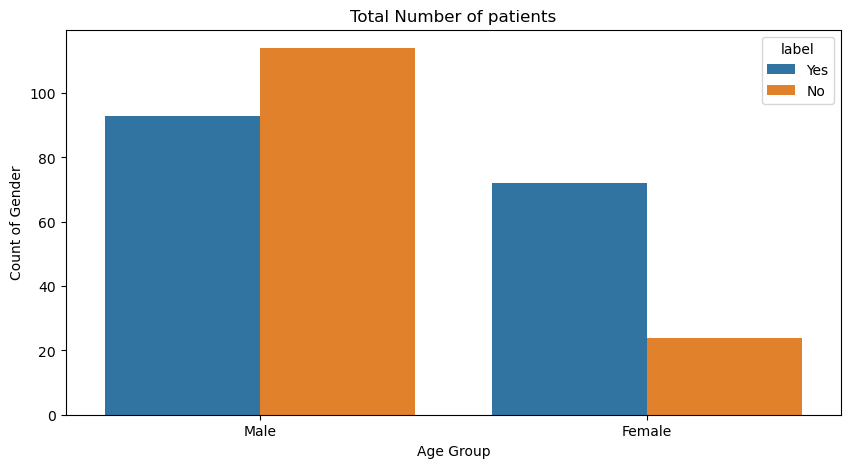

In [200]:
# investigating the gender by the target feature.

plt.figure(figsize =(10,5))
sns.countplot(x="gender" ,data=df , hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Gender")
plt.title("Total Number of patients");

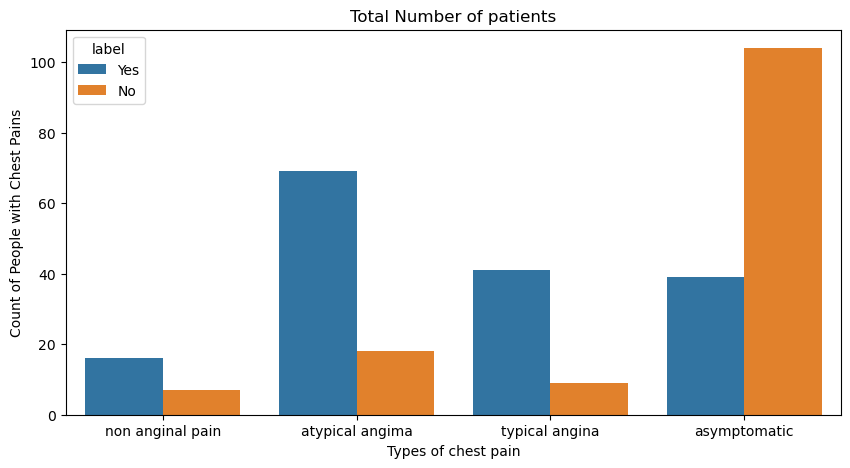

In [201]:
# investigating the Chest Pains Patients by the target feature.

plt.figure(figsize =(10,5))
sns.countplot(x="cp_cat" ,data=df , hue="label")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of People with Chest Pains")
plt.title("Total Number of patients");

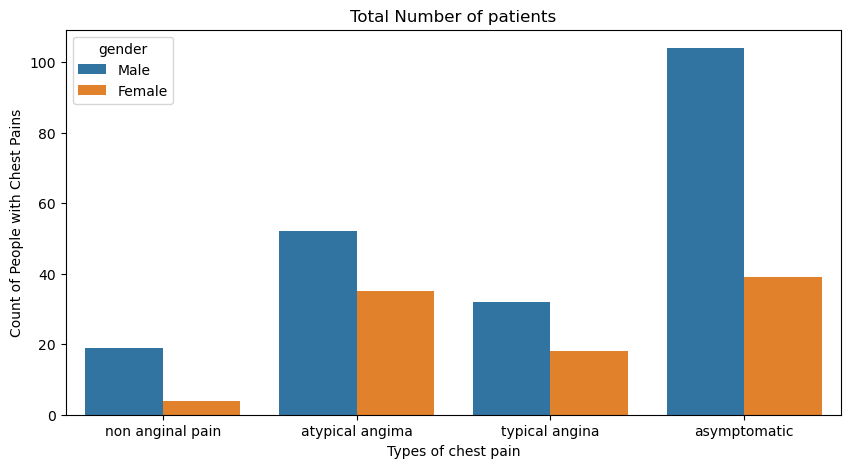

In [202]:
# investigating the Chest Pains patients by the Gender.

plt.figure(figsize =(10,5))
sns.countplot(x="cp_cat" ,data=df , hue="gender")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of People with Chest Pains")
plt.title("Total Number of patients");

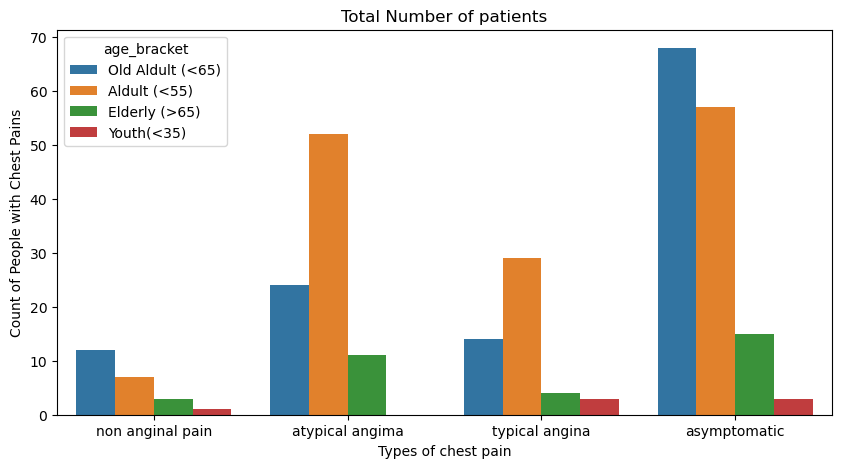

In [204]:
# investigating the Chest Pains patients by the Age group

plt.figure(figsize =(10,5))
sns.countplot(x="cp_cat" ,data=df , hue="age_bracket")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of People with Chest Pains")
plt.title("Total Number of patients");

### Multivariate Analysis

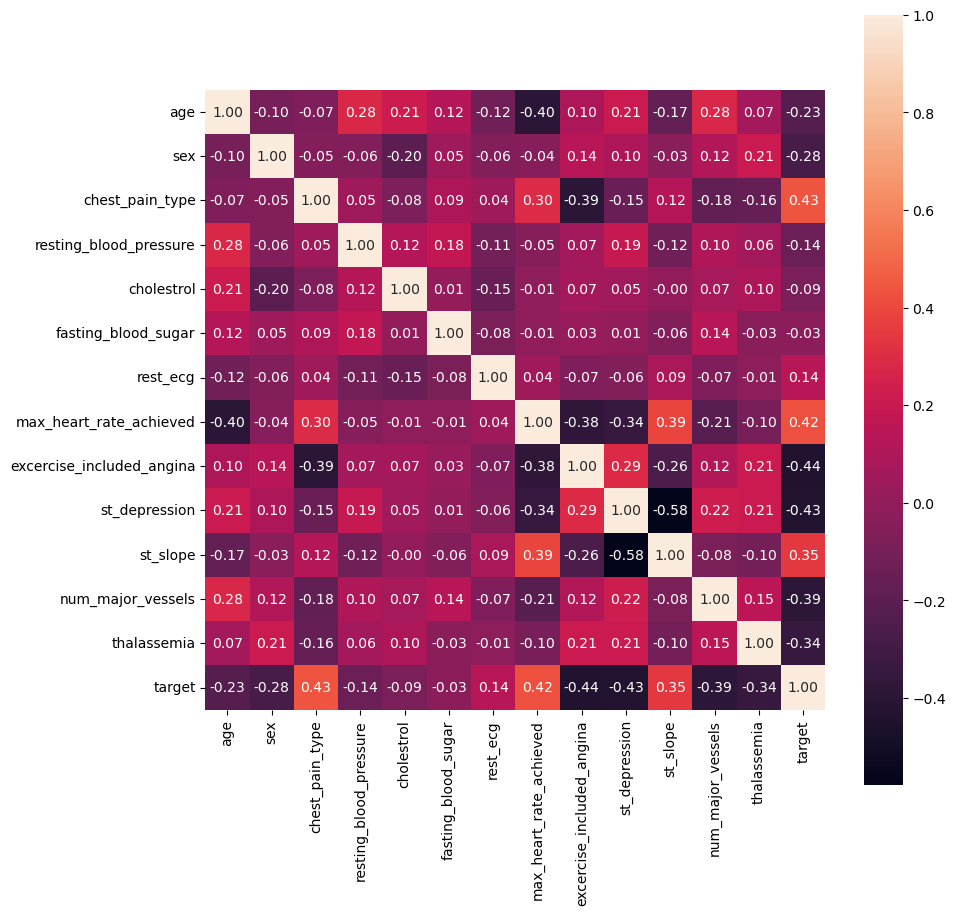

In [209]:
#df.corr()

numerical_df = df.select_dtypes(exclude = "object")

corr = numerical_df.corr

plt.figure(figsize = (10,10))

hm = sns.heatmap(corr(), cbar=True , annot=True, square =True, fmt='.2f', annot_kws={"size":10});

#### Feature Engineering/ data Pre -processing

In [213]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Aldult (<65),Male,non anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Aldult (<55),Male,atypical angima,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Aldult (<55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Aldult (<65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Aldult (<65),Female,asymptomatic,Yes


In [215]:
# create a new dataframe 
# exclude Target/label alongside other columns that was created - To avoid overfitting

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'excercise_included_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

In [217]:
features= df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'excercise_included_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia']]

labels= df[['target']]

In [218]:
features.head() # training Data

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [220]:
label.head() # training answers or marking script excluded from original data

AttributeError: 'function' object has no attribute 'head'

In [ ]:
# check the data types to include int/float only 

df1.dtypes

In [ ]:
# deal with outliers in the dataset - resting blood pressure, cholestrol, thalassemia
# normalize the data

scaler = MinMaxScaler()

features['Scaled_RBP'] = scaler.fit_transform(features['resting_blood_pressure'].values.reshape(-1,1))
features['Scaled_Chol'] = scaler.fit_transform(features['cholestrol'].values.reshape(-1,1))
features['Scaled_thal'] = scaler.fit_transform(features['thalassemia'].values.reshape(-1,1))
features['Scaled_max_heart_rate'] = scaler.fit_transform(features['max_heart_rate_achieved'].values.reshape(-1,1))

features.drop(['resting_blood_pressure','thalassemia','cholestrol','max_heart_rate_achieved'], axis=1 , inplace=True)

features.head()


In [ ]:
labels

In [ ]:
print(f"The dataset has {len(features)} records after splitting.")

## Machine Learning
#### logistic regression

In [ ]:
#split the dataset into training and testing sets- x= questions, y= answers

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

In [222]:
print(f"Our train data contains {len(X_train)} records after spliting")

Our train data contains 242 records after spliting


In [225]:
print(f"Our test data contains {len(X_test)} records after spliting")

Our test data contains 61 records after spliting


In [227]:
len(X_train) + len(X_test) == len(features)

True

In [229]:
X_train.head(2)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,excercise_included_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_Chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344


In [231]:
y_train.head(2)

,target
132,1
202,0


In [237]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix


              precision    recall  f1-score   support

           0    0.88462   0.79310   0.83636        29
           1    0.82857   0.90625   0.86567        32

    accuracy                        0.85246        61
   macro avg    0.85659   0.84968   0.85102        61
weighted avg    0.85522   0.85246   0.85174        61



<Axes: >

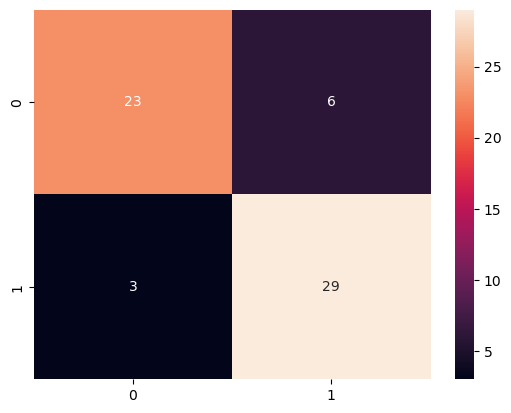

In [239]:
## Initialize Logistic regression
model = LogisticRegression(random_state =42, class_weight = {0:1 , 1:4})

#Train the model 
model.fit(X_train, y_train)
# Make predictions on the test set
predictions = model.predict(X_test)
report= classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)

sns.heatmap(matrix , annot=True, fmt="g")


In [271]:
# Trying other  Machine learning Algorithims.

##Access if other libraries have better outcome on the data

classifiers = [[ XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state =42), 'Decision tree'],
               [LogisticRegression(), 'Logistic regression']
              ]

<-- XGB Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0     0.7812    0.8621    0.8197        29
           1     0.8621    0.7812    0.8197        32

    accuracy                         0.8197        61
   macro avg     0.8217    0.8217    0.8197        61
weighted avg     0.8236    0.8197    0.8197        61



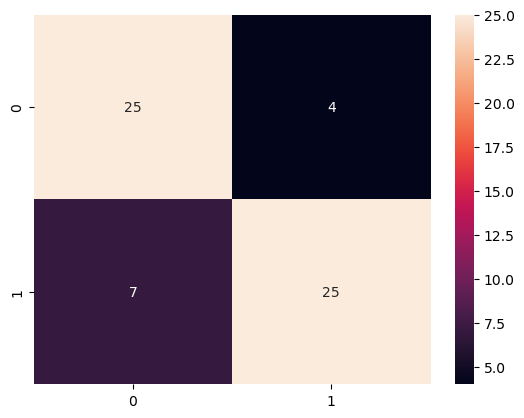

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8621    0.8621    0.8621        29
           1     0.8750    0.8750    0.8750        32

    accuracy                         0.8689        61
   macro avg     0.8685    0.8685    0.8685        61
weighted avg     0.8689    0.8689    0.8689        61



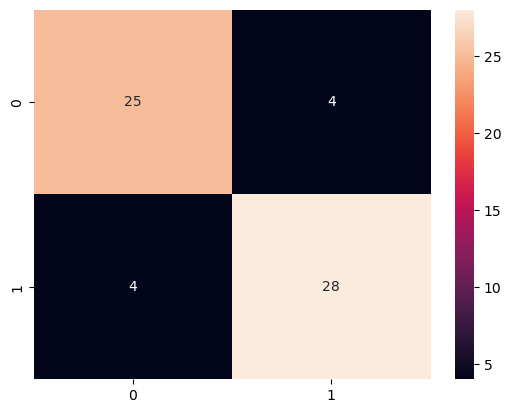

<-- K-nearest Neighbours -->
Classification Report:
               precision    recall  f1-score   support

           0     0.7188    0.7931    0.7541        29
           1     0.7931    0.7188    0.7541        32

    accuracy                         0.7541        61
   macro avg     0.7559    0.7559    0.7541        61
weighted avg     0.7578    0.7541    0.7541        61



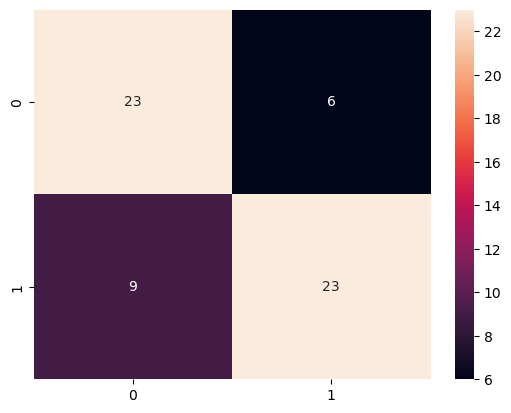

<-- SGD Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0     0.6667    0.8966    0.7647        29
           1     0.8636    0.5938    0.7037        32

    accuracy                         0.7377        61
   macro avg     0.7652    0.7452    0.7342        61
weighted avg     0.7700    0.7377    0.7327        61



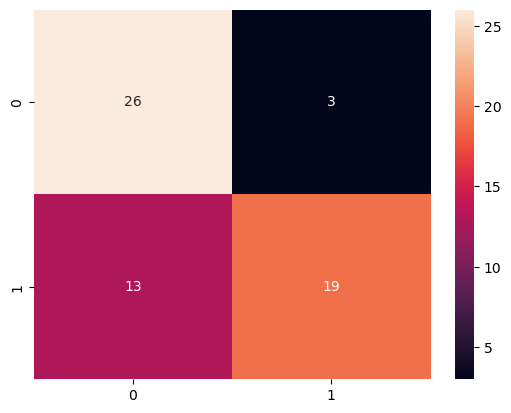

<-- SVC -->
Classification Report:
               precision    recall  f1-score   support

           0     0.6538    0.5862    0.6182        29
           1     0.6571    0.7188    0.6866        32

    accuracy                         0.6557        61
   macro avg     0.6555    0.6525    0.6524        61
weighted avg     0.6556    0.6557    0.6541        61



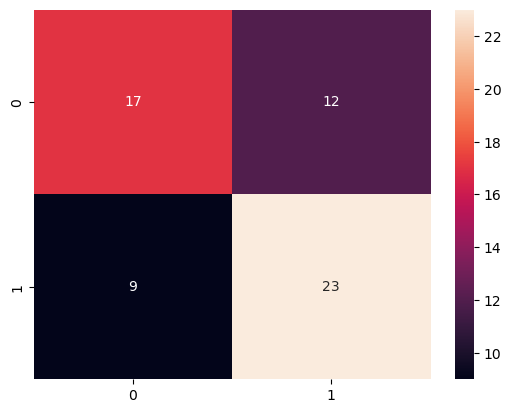

<-- Naive Bayes -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



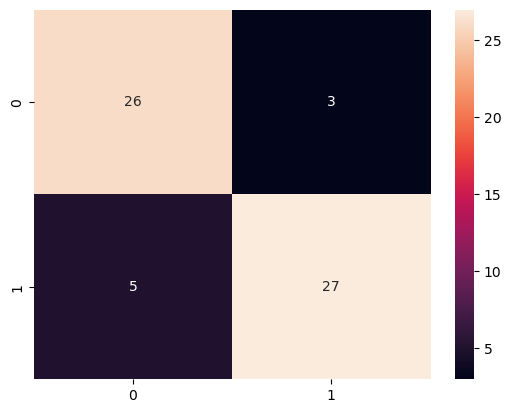

<-- Decision tree -->
Classification Report:
               precision    recall  f1-score   support

           0     0.7941    0.9310    0.8571        29
           1     0.9259    0.7812    0.8475        32

    accuracy                         0.8525        61
   macro avg     0.8600    0.8561    0.8523        61
weighted avg     0.8633    0.8525    0.8521        61



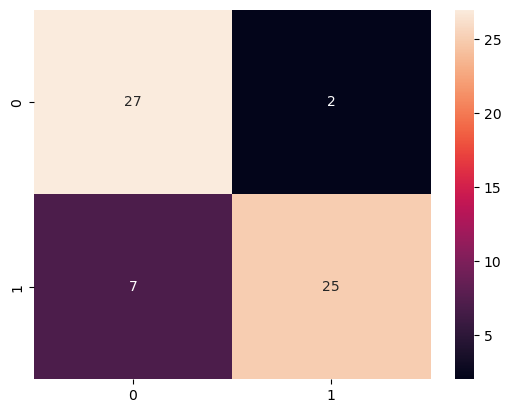

<-- Logistic regression -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8333    0.8621    0.8475        29
           1     0.8710    0.8438    0.8571        32

    accuracy                         0.8525        61
   macro avg     0.8522    0.8529    0.8523        61
weighted avg     0.8531    0.8525    0.8525        61



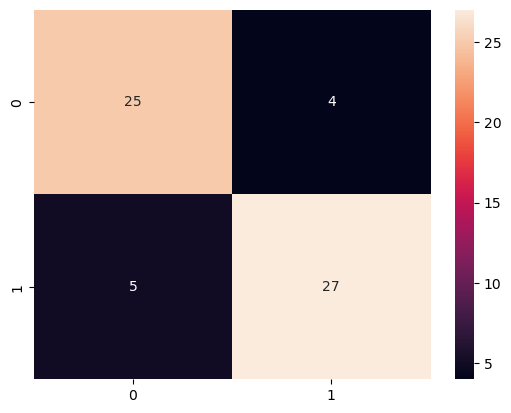

In [274]:
from sklearn.metrics import classification_report, confusion_matrix

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, digits=4)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()


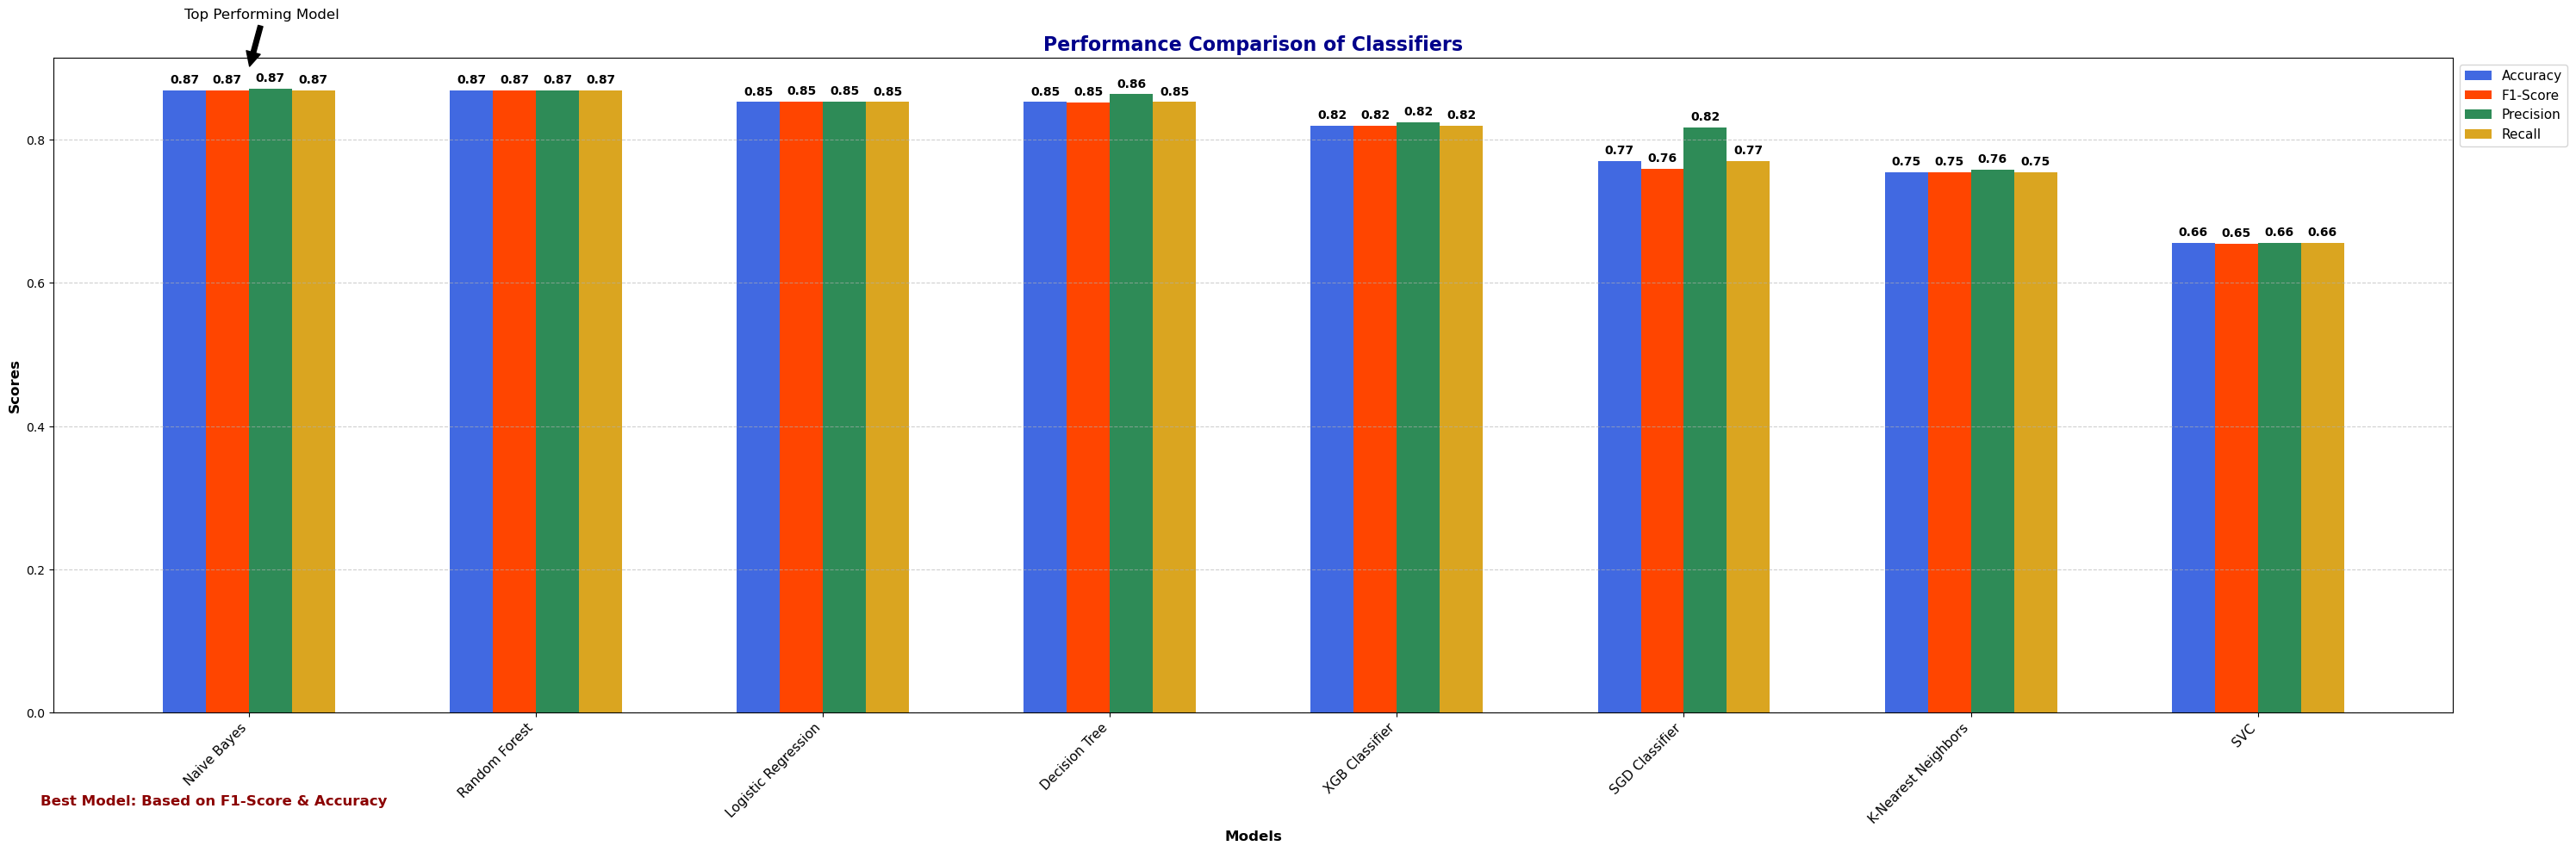

In [310]:

# Set figure size
plt.figure(figsize=(30, 10))

# Define bar width and positions
bar_width = 0.15  
x = np.arange(len(results_df.index))  # Model positions

# Define color palette
colors = ["royalblue", "orangered", "seagreen", "goldenrod"]

# Plot bars for each metric
metrics = ["Accuracy", "F1-Score", "Precision", "Recall"]
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric, color=colors[i])
    
    # Add value labels on bars
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width, value + 0.01, f"{value:.2f}", ha='center', fontsize=10, fontweight="bold")

# main title
plt.title("Performance Comparison of Classifiers", fontsize=16, fontweight="bold", color="darkblue")

# Add a description inside the plot
plt.text(-0.5, max(results_df.max()) - 1,  
         "Best Model: Based on F1-Score & Accuracy", fontsize=12, fontweight="bold", color="darkred")

# Annotation pointing to the best model
best_model_index = results_df["F1-Score"].idxmax()
best_model_position = np.where(results_df.index == best_model_index)[0][0]
plt.annotate("Top Performing Model", 
             xy=(best_model_position + 1.5 * bar_width, results_df.loc[best_model_index, "F1-Score"] + 0.03),
             xytext=(best_model_position, results_df.loc[best_model_index, "F1-Score"] + 0.1),
             arrowprops=dict(facecolor="black", shrink=0.05),
             fontsize=12, color="black")

# Set x-axis labels
plt.xlabel("Models", fontsize=12, fontweight="bold")
plt.ylabel("Scores", fontsize=12, fontweight="bold")
plt.xticks(x + 1.5 * bar_width, results_df.index, rotation=45, ha="right", fontsize=11)

# Add legend and grid
plt.legend(fontsize=11, loc="upper left", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Optimize layout
plt.tight_layout()
plt.show()
